version 3

- even larger fontsize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
%matplotlib inline

fontsz_title = 26
fontsz_label = 26
fontsz_legend = 26

# False Negative

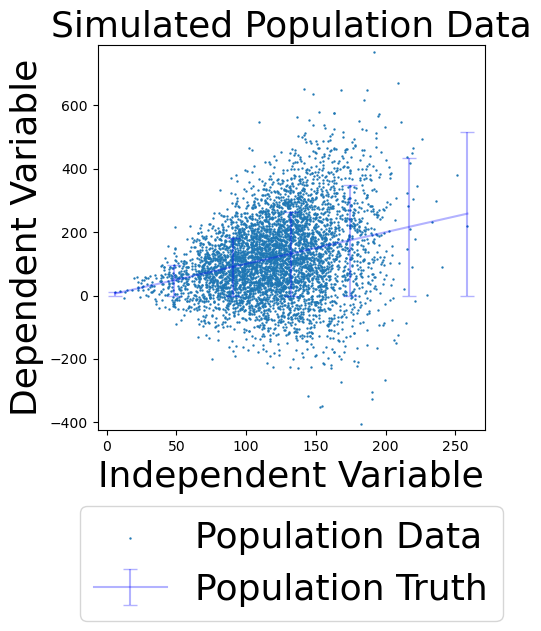

In [2]:
seed = 1
np.random.seed(seed)
num_total = 5000

x = np.random.normal(loc=120, scale=35, size=num_total)
noise = np.zeros_like(x)
for i in range(num_total):
    noise[i] = np.random.normal(loc=0, scale=x[i])
    
y = 1 * x + noise

# Subplot-1: truth of population data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
x_errplot = np.linspace(np.min(x), np.max(x), 7)
y_errplot = 1 * x_errplot
yerr = x_errplot

ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5, alpha=0.3, label='Population Truth')
ax.scatter(x, y, c='tab:blue', s=0.5, label='Population Data')
ax.set_title('Simulated Population Data', fontsize=fontsz_title)
ax.set_ylabel('Dependent Variable', fontsize=fontsz_label)
ax.set_xlabel('Independent Variable', fontsize=fontsz_label)
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=fontsz_legend)
fig.savefig('./figs/FN_population_data.png', dpi=300, bbox_inches='tight')

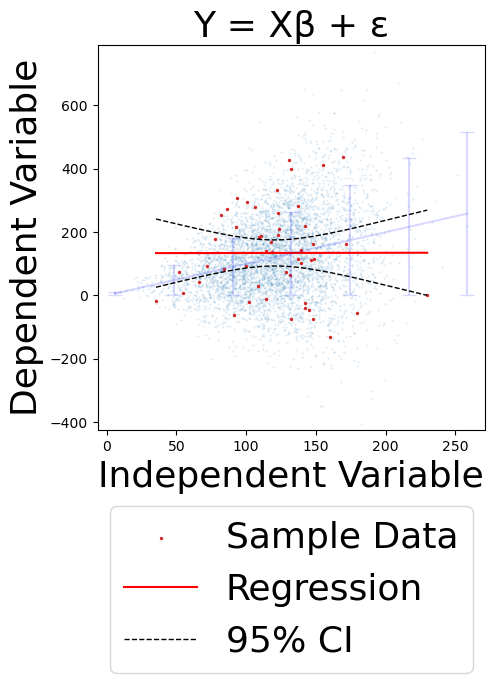

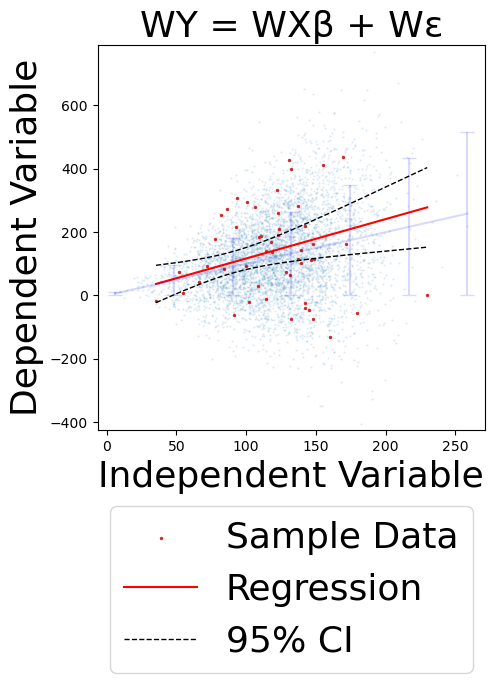

In [3]:
sample_size = 50
# 223, 654, 1
seed = 223
np.random.seed(seed)

idxs = np.random.choice(num_total, size=sample_size, replace=False)
x_s = x[idxs]
y_s = y[idxs]

# Subplot-2: Sample and OLS without whitening
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5, alpha=0.15)
ax.scatter(x, y, c='tab:blue', s=0.5, alpha=0.1)
ax.scatter(x_s, y_s, c='tab:red',s=2, label='Sample Data')
ax.set_title('Y = Xβ + ε', fontsize=fontsz_title)
ax.set_ylabel('Dependent Variable', fontsize=fontsz_label)
ax.set_xlabel('Independent Variable', fontsize=fontsz_label)
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

# Regression line and CI
X = np.column_stack((np.ones_like(x_s), x_s))
Y = y_s
results = sm.OLS(Y,X).fit()
st, dat, ss2 = summary_table(results, alpha=0.05)
predict_ci_low, predict_ci_upp = dat[:, 4:6].T

sorting = np.argsort(x_s)
x_sorted = x_s[sorting]
y_pred_sorted = results.fittedvalues[sorting]
predict_ci_low_sorted = predict_ci_low[sorting]
predict_ci_upp_sorted = predict_ci_upp[sorting]

ax.plot(x_sorted, y_pred_sorted, color='r', label='Regression')
ax.plot(x_sorted, predict_ci_low_sorted, 'k--', linewidth=1, label='95% CI')
ax.plot(x_sorted, predict_ci_upp_sorted, 'k--', linewidth=1)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=fontsz_legend)
fig.savefig('./figs/FN_regression_wo_whitening.png', dpi=300, bbox_inches='tight')

# Figure-3: with whitening
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5, alpha=0.15)
ax.scatter(x, y, c='tab:blue', s=0.5, alpha=0.1)
ax.scatter(x_s, y_s, c='tab:red',s=2, label='Sample Data')
ax.set_title("WY = WXβ + Wε", fontsize=fontsz_title)
ax.set_ylabel('Dependent Variable', fontsize=fontsz_label)
ax.set_xlabel('Independent Variable', fontsize=fontsz_label)
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

# With whitening matrix
W = np.zeros((x_s.shape[0], x_s.shape[0]))
for i,a in enumerate(x_s):
	W[i,i] = x_s[i]**(-1)
W_inv = np.linalg.inv(W)

WY = np.matmul(W, Y)
WX = np.matmul(W, X)
results_w = sm.OLS(WY,WX).fit()
st, dat, ss2 = summary_table(results_w, alpha=0.05)
predict_ci_low, predict_ci_upp = dat[:, 4:6].T

sorting = np.argsort(x_s)
x_sorted = x_s[sorting]
y_pred_sorted = np.matmul(W_inv, results_w.fittedvalues)[sorting]
predict_ci_low_sorted = np.matmul(W_inv, predict_ci_low)[sorting]
predict_ci_upp_sorted = np.matmul(W_inv, predict_ci_upp)[sorting]

ax.plot(x_sorted, y_pred_sorted, color='r', label='Regression')
ax.plot(x_sorted, predict_ci_low_sorted, 'k--', linewidth=1, label='95% CI')
ax.plot(x_sorted, predict_ci_upp_sorted, 'k--', linewidth=1)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=fontsz_legend)
fig.savefig('./figs/FN_regression_with_whitening.png', dpi=300, bbox_inches='tight')

In [4]:
import json
from tqdm import tqdm

num_exp = 10000
num_sim_per_exp = 100

with open('./fn_without_whitening.json', 'r') as f:
    list_fn_without = json.load(f)
with open('./fn_with_whitening.json', 'r') as f:
    list_fn_with_w = json.load(f)

# for _ in tqdm(range(num_exp)):
#     num_fn_without = 0
#     num_fn_with_w = 0
    
#     for _ in range(num_sim_per_exp):
                
#         idxs = np.random.choice(num_total, size=sample_size, replace=False)
#         x_s = x[idxs]
#         y_s = y[idxs]

#         # without whitening
#         X = np.column_stack((np.ones_like(x_s), x_s))
#         Y = y_s
#         results = sm.OLS(Y,X).fit()
#         if results.pvalues[1]>0.05:
#             num_fn_without += 1

#         # with whitening matrix
#         W = np.zeros((x_s.shape[0], x_s.shape[0]))
#         for i,a in enumerate(x_s):
#             W[i,i] = x_s[i]**(-1)

#         WY = np.matmul(W, Y)
#         WX = np.matmul(W, X)
#         results_w = sm.OLS(WY,WX).fit()
#         if results_w.pvalues[1]>0.05:
#             num_fn_with_w += 1
    
#     list_fn_without.append(num_fn_without)
#     list_fn_with_w.append(num_fn_with_w)


# with open('./fn_without_whitening.json', 'w') as f:
#     json.dump(list_fn_without, f)
# with open('./fn_with_whitening.json', 'w') as f:
#     json.dump(list_fn_with_w, f)

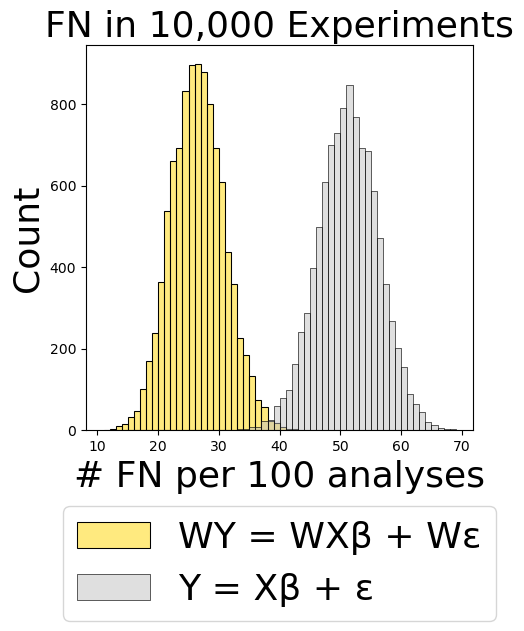

In [5]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

sns.histplot(list_fn_with_w, ax=ax,  binwidth=1, color='gold', alpha=0.5, label='WY = WXβ + Wε')
sns.histplot(list_fn_without, ax=ax, binwidth=1, color='silver', alpha=0.5, label='Y = Xβ + ε')

ax.set_title('FN in 10,000 Experiments', fontsize=fontsz_title)
ax.set_ylabel('Count', fontsize=fontsz_label)
ax.set_xlabel('# FN per 100 analyses', fontsize=fontsz_label)
# ax.set_ylim(top=1000,bottom=0)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=fontsz_legend)
fig.savefig('./figs/FN_hist.png', dpi=300, bbox_inches='tight')

# False Positive

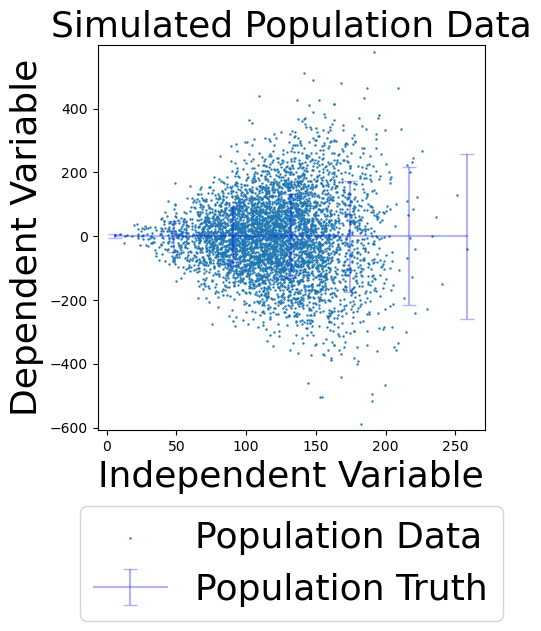

In [6]:
seed = 1
np.random.seed(seed)
num_total = 5000

x = np.random.normal(loc=120, scale=35, size=num_total)
noise = np.zeros_like(x)
for i in range(num_total):
    noise[i] = np.random.normal(loc=0, scale=x[i])
    
y = noise

# Subplot-1: truth of population data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
x_errplot = np.linspace(np.min(x), np.max(x), 7)
y_errplot = 0 * x_errplot
yerr = x_errplot

ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5, alpha=0.3, label='Population Truth')
ax.scatter(x, y, c='tab:blue', s=0.5, label='Population Data')
ax.set_title('Simulated Population Data', fontsize=fontsz_title)
ax.set_ylabel('Dependent Variable', fontsize=fontsz_label)
ax.set_xlabel('Independent Variable', fontsize=fontsz_label)
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=fontsz_legend)
fig.savefig('./figs/FP_population_data.png', dpi=300, bbox_inches='tight')

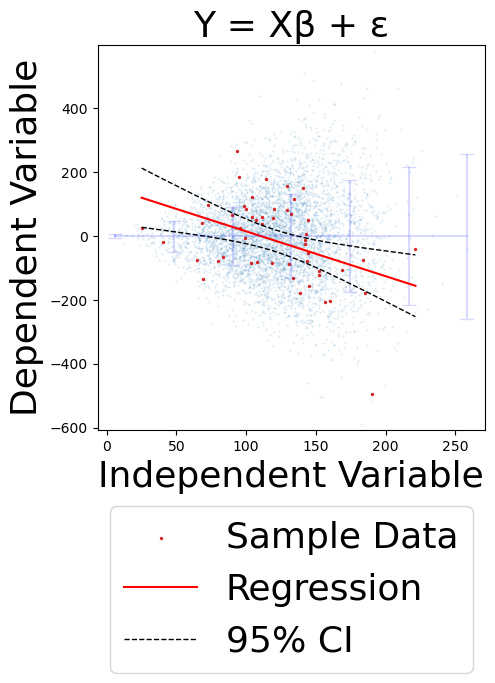

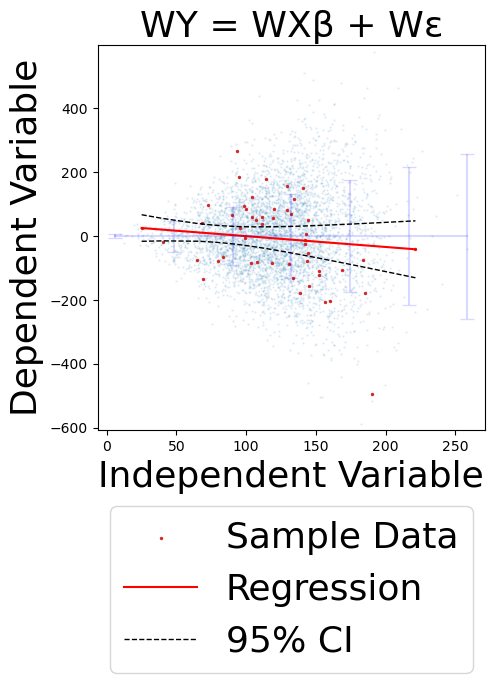

In [7]:
sample_size = 50
# 41, 158, 338
seed=41
np.random.seed(seed)

idxs = np.random.choice(num_total, size=sample_size, replace=False)
x_s = x[idxs]
y_s = y[idxs]

# Subplot-2: Sample and OLS without whitening
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5, alpha=0.15)
ax.scatter(x, y, c='tab:blue', s=0.5, alpha=0.1)
ax.scatter(x_s, y_s, c='tab:red',s=2, label='Sample Data')
ax.set_title('Y = Xβ + ε', fontsize=fontsz_title)
ax.set_ylabel('Dependent Variable', fontsize=fontsz_label)
ax.set_xlabel('Independent Variable', fontsize=fontsz_label)
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

# Regression line and CI
X = np.column_stack((np.ones_like(x_s), x_s))
Y = y_s
results = sm.OLS(Y,X).fit()
st, dat, ss2 = summary_table(results, alpha=0.05)
predict_ci_low, predict_ci_upp = dat[:, 4:6].T

sorting = np.argsort(x_s)
x_sorted = x_s[sorting]
y_pred_sorted = results.fittedvalues[sorting]
predict_ci_low_sorted = predict_ci_low[sorting]
predict_ci_upp_sorted = predict_ci_upp[sorting]

ax.plot(x_sorted, y_pred_sorted, color='r', label='Regression')
ax.plot(x_sorted, predict_ci_low_sorted, 'k--', linewidth=1, label='95% CI')
ax.plot(x_sorted, predict_ci_upp_sorted, 'k--', linewidth=1)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=fontsz_legend)
fig.savefig('./figs/FP_regression_wo_whitening.png', dpi=300, bbox_inches='tight')


# Figure-3: with whitening
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.errorbar(x_errplot, y_errplot, yerr=yerr, fmt='-b', capsize=5, alpha=0.15)
ax.scatter(x, y, c='tab:blue', s=0.5, alpha=0.1)
ax.scatter(x_s, y_s, c='tab:red',s=2, label='Sample Data')
ax.set_title('WY = WXβ + Wε', fontsize=fontsz_title)
ax.set_ylabel('Dependent Variable', fontsize=fontsz_label)
ax.set_xlabel('Independent Variable', fontsize=fontsz_label)
ax.set_ylim(top=np.max(y)+20,bottom=np.min(y)-20)

# With whitening matrix
W = np.zeros((x_s.shape[0], x_s.shape[0]))
for i,a in enumerate(x_s):
    W[i,i] = x_s[i]**(-1)
W_inv = np.linalg.inv(W)

WY = np.matmul(W, Y)
WX = np.matmul(W, X)
results_w = sm.OLS(WY,WX).fit()
st, dat, ss2 = summary_table(results_w, alpha=0.05)
predict_ci_low, predict_ci_upp = dat[:, 4:6].T

sorting = np.argsort(x_s)
x_sorted = x_s[sorting]
y_pred_sorted = np.matmul(W_inv, results_w.fittedvalues)[sorting]
predict_ci_low_sorted = np.matmul(W_inv, predict_ci_low)[sorting]
predict_ci_upp_sorted = np.matmul(W_inv, predict_ci_upp)[sorting]

ax.plot(x_sorted, y_pred_sorted, color='r', label='Regression')
ax.plot(x_sorted, predict_ci_low_sorted, 'k--', linewidth=1, label='95% CI')
ax.plot(x_sorted, predict_ci_upp_sorted, 'k--', linewidth=1)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=fontsz_legend)
fig.savefig('./figs/FP_regression_with_whitening.png', dpi=300, bbox_inches='tight')


In [8]:
import json
from tqdm import tqdm

num_exp = 10000
num_sim_per_exp = 100

with open('./fp_without_whitening.json', 'r') as f:
    list_fp_without = json.load(f)
with open('./fp_with_whitening.json', 'r') as f:
    list_fp_with_w = json.load(f)

# for _ in tqdm(range(num_exp)):
#     num_fp_without = 0
#     num_fp_with_w = 0
    
#     for _ in range(num_sim_per_exp):
                
#         idxs = np.random.choice(num_total, size=sample_size, replace=False)
#         x_s = x[idxs]
#         y_s = y[idxs]

#         # without whitening
#         X = np.column_stack((np.ones_like(x_s), x_s))
#         Y = y_s
#         results = sm.OLS(Y,X).fit()
#         if results.pvalues[1]<0.05:
#             num_fp_without += 1

#         # with whitening matrix
#         W = np.zeros((x_s.shape[0], x_s.shape[0]))
#         for i,a in enumerate(x_s):
#             W[i,i] = x_s[i]**(-1)

#         WY = np.matmul(W, Y)
#         WX = np.matmul(W, X)
#         results_w = sm.OLS(WY,WX).fit()
#         if results_w.pvalues[1]<0.05:
#             num_fp_with_w += 1
    
#     list_fp_without.append(num_fp_without)
#     list_fp_with_w.append(num_fp_with_w)


# with open('./fp_without_whitening.json', 'w') as f:
#     json.dump(list_fp_without, f)
# with open('./fp_with_whitening.json', 'w') as f:
#     json.dump(list_fp_with_w, f)

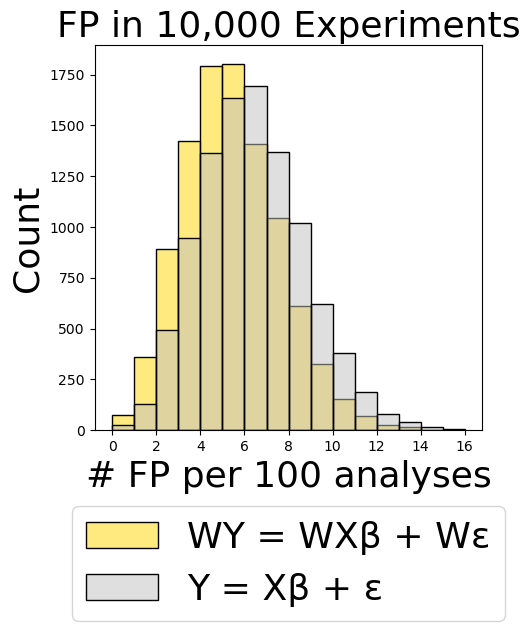

In [9]:
import pandas as pd
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

sns.histplot(list_fp_with_w, ax=ax,  binwidth=1, color='gold', alpha=0.5, label='WY = WXβ + Wε')
sns.histplot(list_fp_without, ax=ax, binwidth=1, color='silver', alpha=0.5, label='Y = Xβ + ε')

ax.set_title('FP in 10,000 Experiments', fontsize=fontsz_title)
ax.set_ylabel('Count', fontsize=fontsz_label)
ax.set_xlabel('# FP per 100 analyses', fontsize=fontsz_label)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=fontsz_legend)
fig.savefig('./figs/FP_hist.png', dpi=300, bbox_inches='tight')